In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression,RidgeCV,ElasticNetCV,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,confusion_matrix,classification_report
import warnings

warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/kaggle/input/medical-insurance-cost-prediction/medical_insurance.csv')
df.head()

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,...,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,...,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,...,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,...,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,...,0,1,0,2,0,1,1,0,1,0


In [3]:
df.shape

(100000, 54)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   person_id                    100000 non-null  int64  
 1   age                          100000 non-null  int64  
 2   sex                          100000 non-null  object 
 3   region                       100000 non-null  object 
 4   urban_rural                  100000 non-null  object 
 5   income                       100000 non-null  float64
 6   education                    100000 non-null  object 
 7   marital_status               100000 non-null  object 
 8   employment_status            100000 non-null  object 
 9   household_size               100000 non-null  int64  
 10  dependents                   100000 non-null  int64  
 11  bmi                          100000 non-null  float64
 12  smoker                       100000 non-null  object 
 13  

Analysing different factors effecting Annual medical cost and its distribution:
demographics, health conditions, lifestyle factors and medical expenditures.

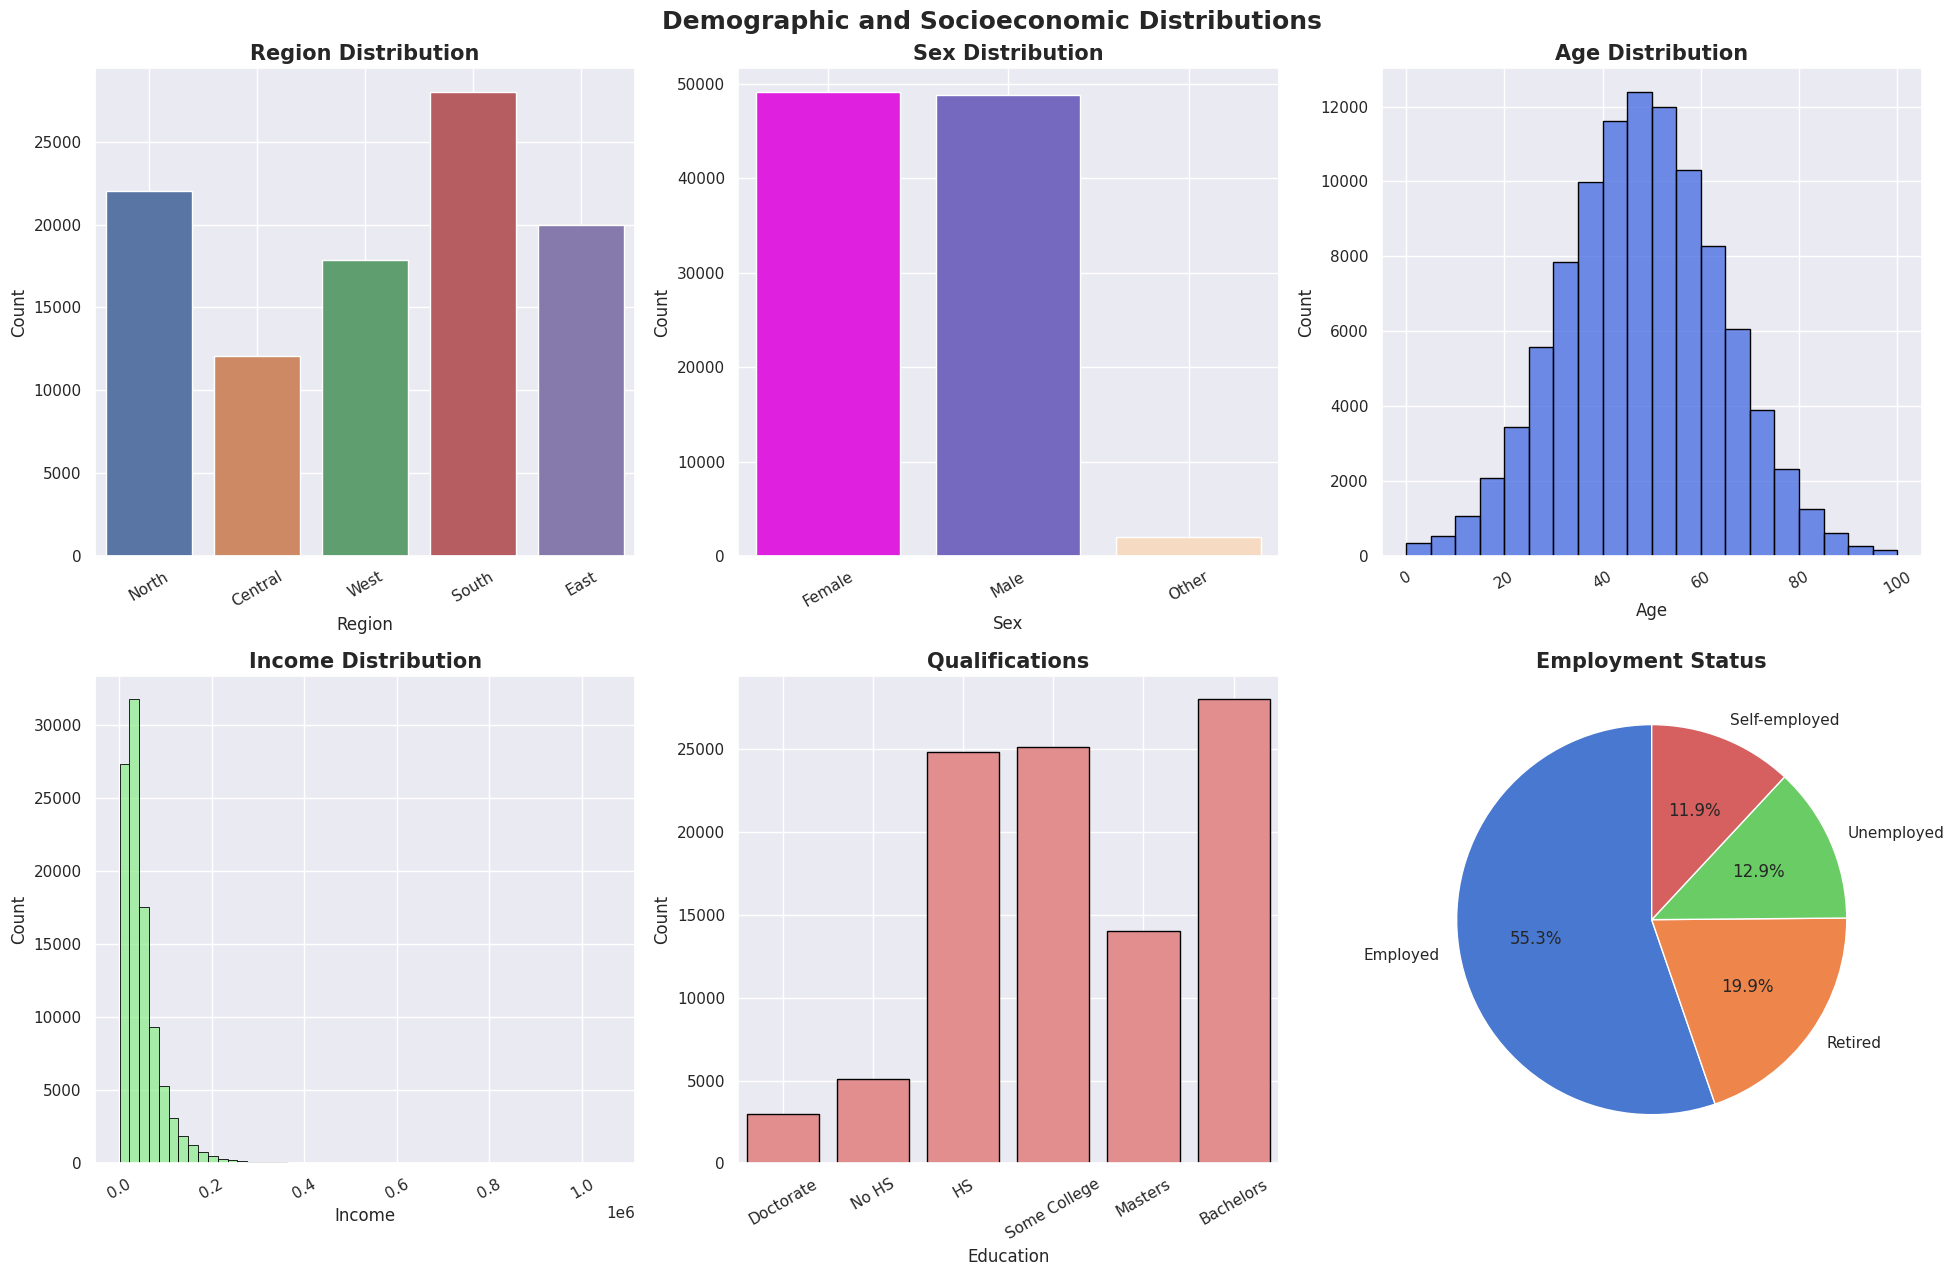

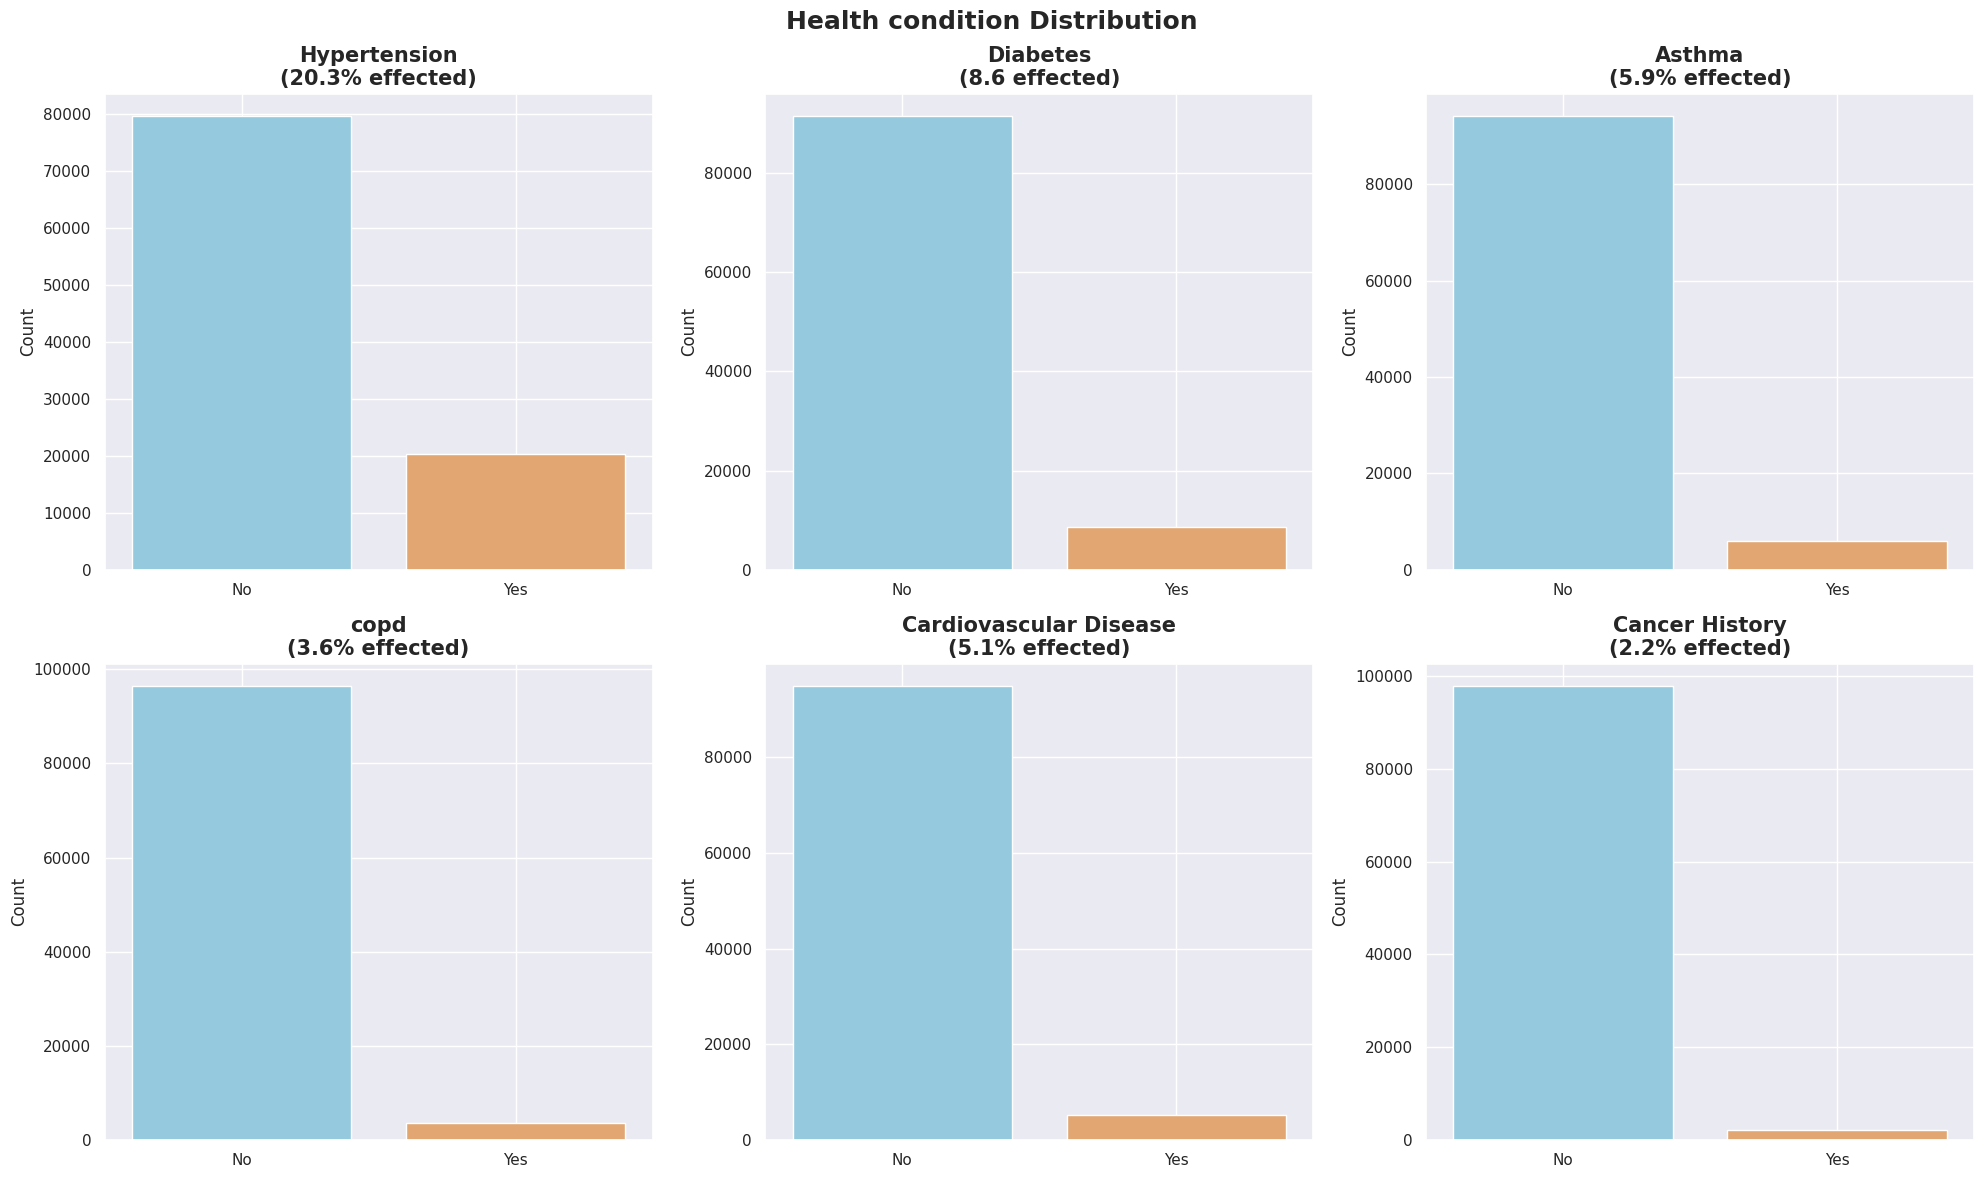

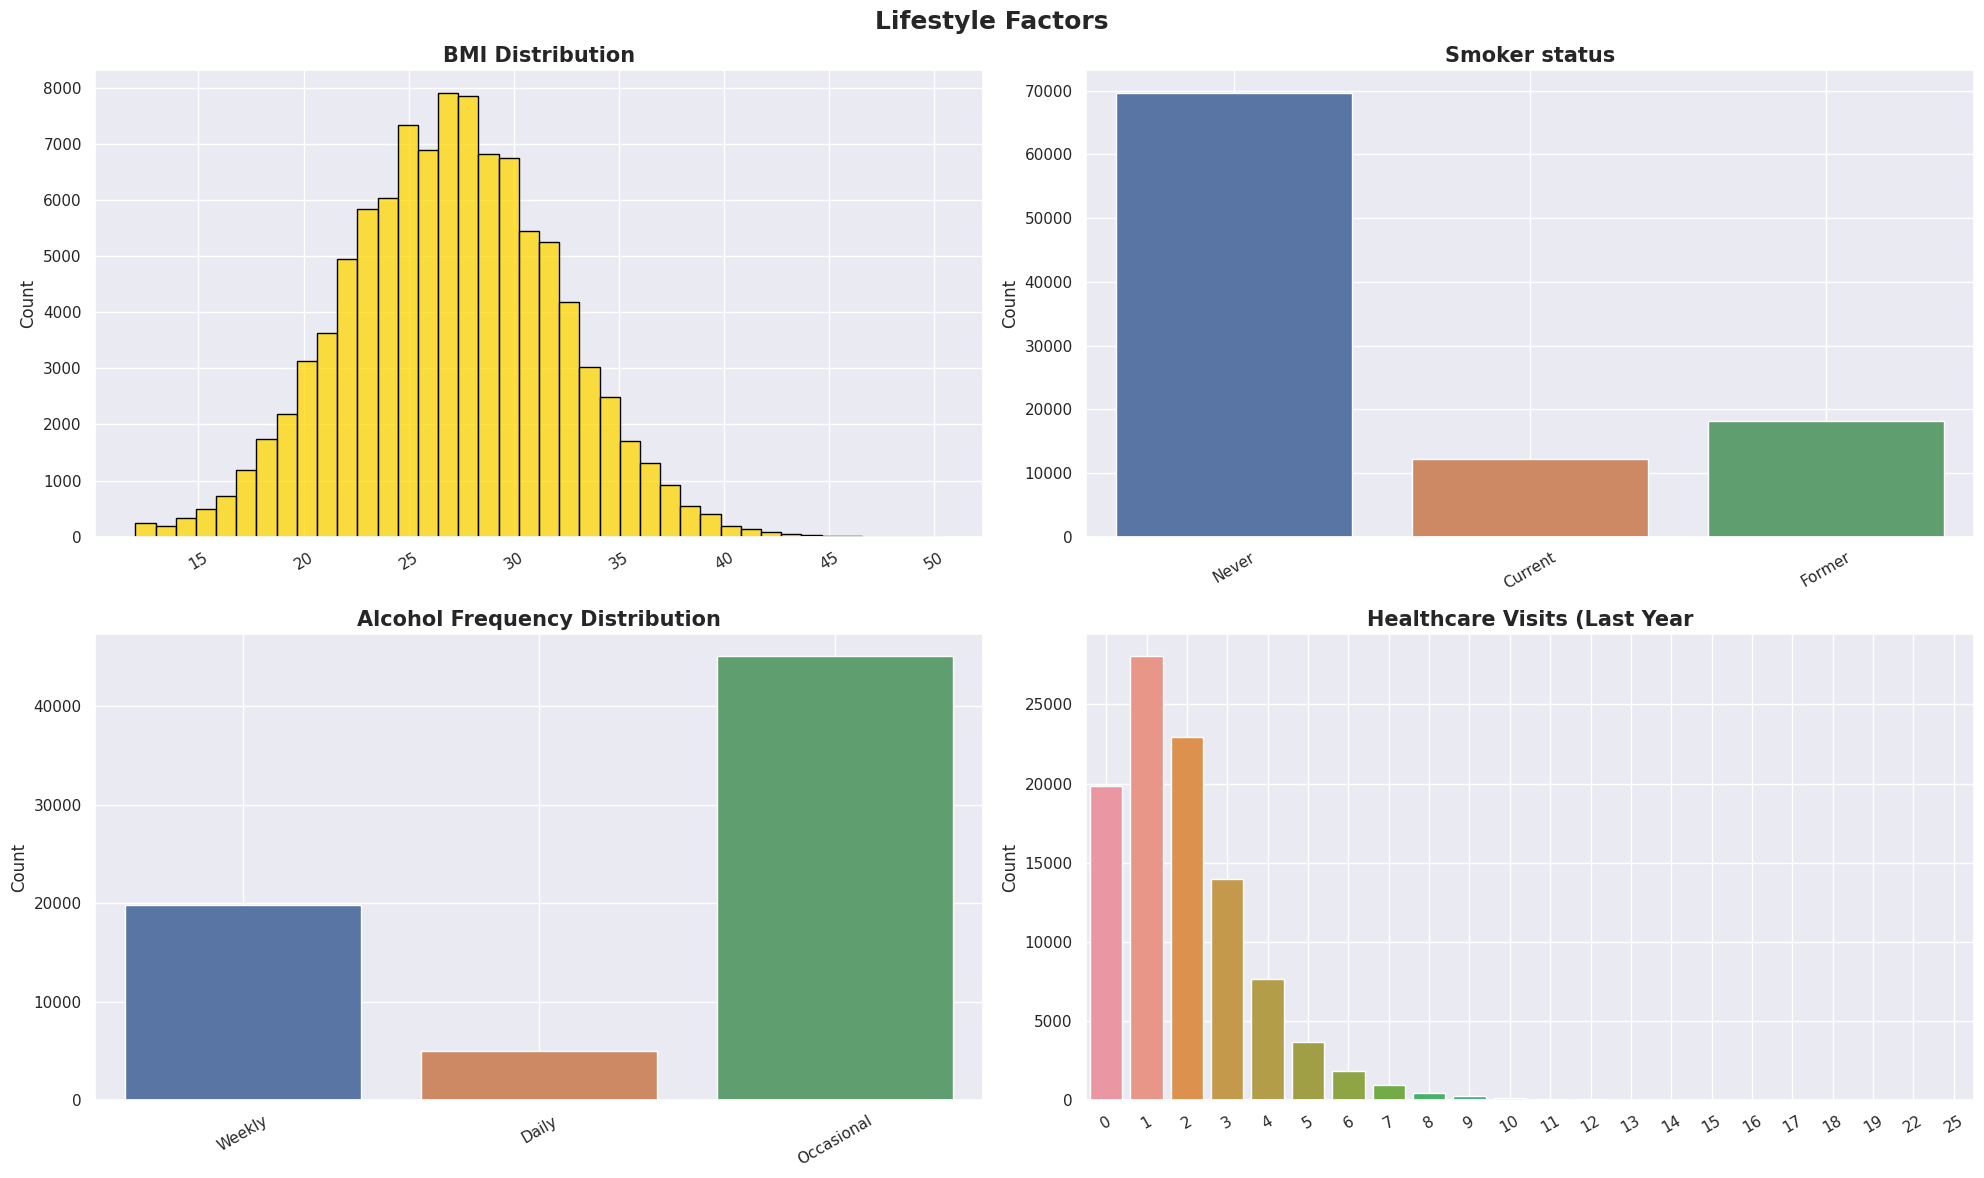

In [5]:
demographic_cols=['region','urban_rural','age','sex']
health_cols=['hypertension','diabetes','asthma','copd','cardiovascular_disease','cancer_history']
lifestyle_cols=['bmi','smoker','alcohol_freq','visits_last_year']


sns.set_theme(style='darkgrid')




fig,axes=plt.subplots(2,3,figsize=(20,13))
sns.countplot(data=df,x='region',ax=axes[0,0]).set_title('Region Distribution',fontsize=15,fontweight='bold')
sns.countplot(data=df,x='sex',palette=['fuchsia','slateblue','peachpuff'],ax=axes[0,1]).set_title('Sex Distribution',fontsize=15,fontweight='bold')
sns.histplot(data=df,x='age',ax=axes[0,2],bins=20,color='royalblue',edgecolor='black').set_title('Age Distribution',fontsize=15,fontweight='bold')
sns.histplot(data=df,x='income',bins=50,color='lightgreen',edgecolor='black',ax=axes[1,0]).set_title('Income Distribution',fontsize=15,fontweight='bold')
sns.countplot(data=df,x='education',color='lightcoral',edgecolor='black',ax=axes[1,1]).set_title('Qualifications',fontsize=15,fontweight='bold')
counts=df['employment_status'].value_counts()
axes[1,2].pie(
    counts,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("muted")
)
axes[1,2].set_title('Employment Status',fontsize=15,fontweight='bold')

for ax in axes.flat:
    ax.set_xlabel(ax.get_xlabel().replace('_', ' ').title(),fontsize=12)
    ax.set_ylabel('Count',fontsize=12)
    ax.tick_params(axis='x',rotation=30)
    ax.grid(True)
axes[1,2].set_ylabel("")

fig.suptitle('Demographic and Socioeconomic Distributions',fontsize=18,fontweight='bold')
plt.tight_layout()
plt.show()





fig,axes=plt.subplots(2,3,figsize=(20,12))
percentage=df['hypertension'].value_counts()[1]/df['hypertension'].value_counts().sum()*100
sns.countplot(x=df['hypertension'].map({0:'No',1:'Yes'}),palette=['skyblue','sandybrown'],ax=axes[0,0]).set_title(f'Hypertension\n({percentage:.1f}% effected)',fontsize=15,fontweight='bold')

percentage=df['diabetes'].value_counts()[1]/df['diabetes'].value_counts().sum()*100
sns.countplot(x=df['diabetes'].map({0:'No',1:'Yes'}),palette=['skyblue','sandybrown'],ax=axes[0,1]).set_title(f'Diabetes\n({percentage:.1f} effected)',fontsize=15,fontweight='bold')

percentage=df['asthma'].value_counts()[1]/df['asthma'].value_counts().sum()*100
sns.countplot(x=df['asthma'].map({0:'No',1:'Yes'}),palette=['skyblue','sandybrown'],ax=axes[0,2]).set_title(f'Asthma\n({percentage:.1f}% effected)',fontsize=15,fontweight='bold')

percentage=df['copd'].value_counts()[1]/df['copd'].value_counts().sum()*100
sns.countplot(x=df['copd'].map({0:'No',1:'Yes'}),palette=['skyblue','sandybrown'],ax=axes[1,0]).set_title(f'copd\n({percentage:.1f}% effected)',fontsize=15,fontweight='bold')

percentage=df['cardiovascular_disease'].value_counts()[1]/df['cardiovascular_disease'].value_counts().sum()*100
sns.countplot(x=df['cardiovascular_disease'].map({0:'No',1:'Yes'}),palette=['skyblue','sandybrown'],ax=axes[1,1]).set_title(f'Cardiovascular Disease\n({percentage:.1f}% effected)',fontsize=15,fontweight='bold')

percentage=df['cancer_history'].value_counts()[1]/df['cancer_history'].value_counts().sum()*100
sns.countplot(x=df['cancer_history'].map({0:'No',1:'Yes'}),palette=['skyblue','sandybrown'],ax=axes[1,2]).set_title(f'Cancer History\n({percentage:.1f}% effected)',fontsize=15,fontweight='bold')

for ax in axes.flat:
    ax.set_xlabel('')
    ax.set_ylabel('Count',fontsize=12)
    ax.grid(True)

fig.suptitle('Health condition Distribution',fontsize=18,fontweight='bold')
plt.tight_layout()
plt.show()






fig,axes=plt.subplots(2,2,figsize=(20,12))
sns.histplot(data=df,x='bmi',bins=40,color='gold',edgecolor='black',ax=axes[0,0]).set_title('BMI Distribution',fontsize=15,fontweight='bold')
sns.countplot(data=df,x='smoker',ax=axes[0,1]).set_title('Smoker status',fontsize=15,fontweight='bold')
sns.countplot(data=df,x='alcohol_freq',ax=axes[1,0]).set_title('Alcohol Frequency Distribution',fontsize=15,fontweight='bold')
sns.countplot(data=df,x='visits_last_year',ax=axes[1,1]).set_title('Healthcare Visits (Last Year',fontsize=15,fontweight='bold')

for ax in axes.flat:
    ax.set_xlabel('')
    ax.set_ylabel('Count',fontsize=12)
    ax.tick_params(axis='x',rotation=30)
    ax.grid(True)

fig.suptitle('Lifestyle Factors',fontsize=18,fontweight='bold')
plt.tight_layout()
plt.show()


Annual cost relationship with different factors

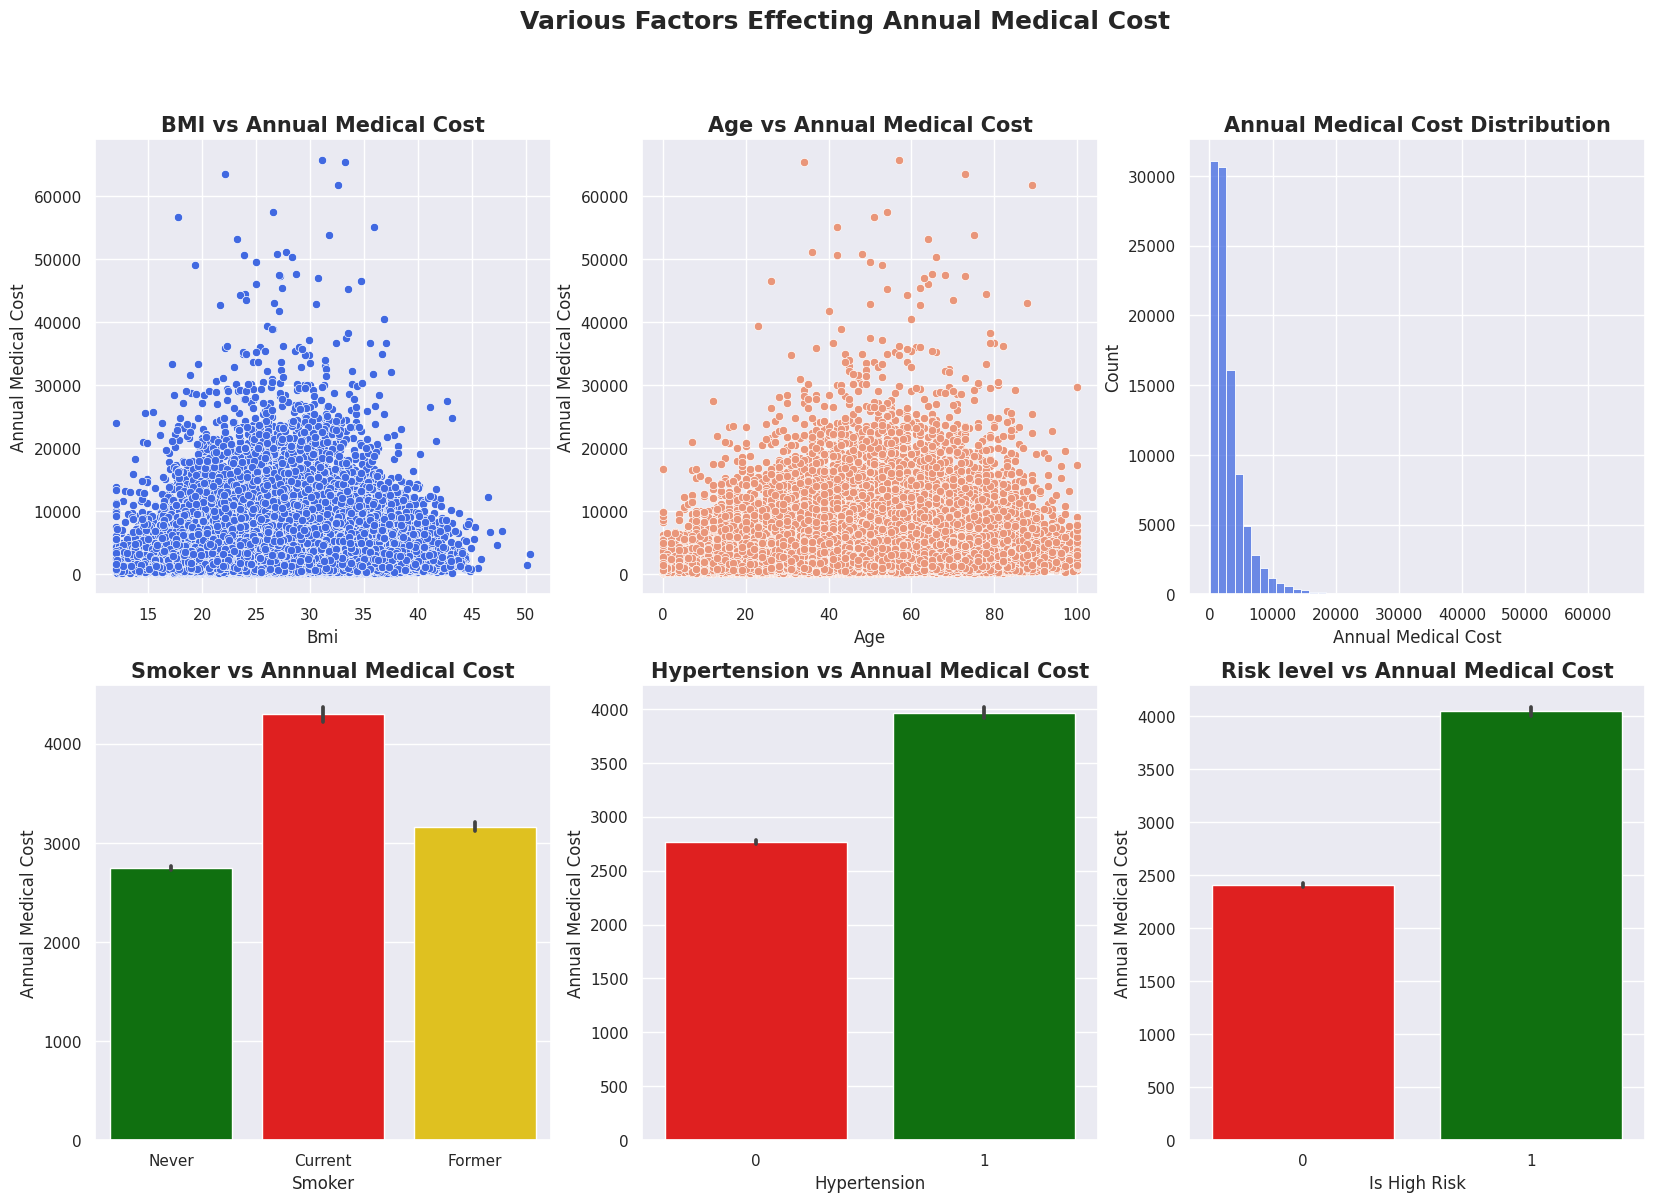

In [6]:
demographic_cols=['region','urban_rural','age','sex']
health_cols=['hypertension','diabetes','asthma','copd','cardiovascular_disease','cancer_history']
lifestyle_cols=['bmi','smoker','alcohol_freq','visits_last_year']



fig,axes=plt.subplots(2,3,figsize=(20,13))
fig.suptitle('Various Factors Effecting Annual Medical Cost',fontsize=18,fontweight='bold')

sns.scatterplot(x=df['bmi'],y=df['annual_medical_cost'],ax=axes[0,0],color='royalblue').set_title('BMI vs Annual Medical Cost',fontsize=15,fontweight='bold')
sns.scatterplot(x=df['age'],y=df['annual_medical_cost'],ax=axes[0,1],color='darksalmon').set_title('Age vs Annual Medical Cost',fontsize=15,fontweight='bold')
sns.histplot(data=df,x='annual_medical_cost',bins=50,color='royalblue',ax=axes[0,2]).set_title('Annual Medical Cost Distribution',fontsize=15,fontweight='bold')
sns.barplot(x=df['smoker'],y=df['annual_medical_cost'],ax=axes[1,0],palette=['green','red','gold']).set_title('Smoker vs Annnual Medical Cost',fontsize=15,fontweight='bold')
sns.barplot(x=df['hypertension'],y=df['annual_medical_cost'],ax=axes[1,1],palette=['red','green']).set_title('Hypertension vs Annual Medical Cost',fontsize=15,fontweight='bold')
sns.barplot(x=df['is_high_risk'],y=df['annual_medical_cost'],ax=axes[1,2],palette=['red','green']).set_title('Risk level vs Annual Medical Cost',fontsize=15,fontweight='bold')

for ax in axes.flat:
    ax.set_xlabel(ax.get_xlabel().replace('_',' ').title(),fontsize=12)
    ax.set_ylabel(ax.get_ylabel().replace('_',' ').title(),fontsize=12)

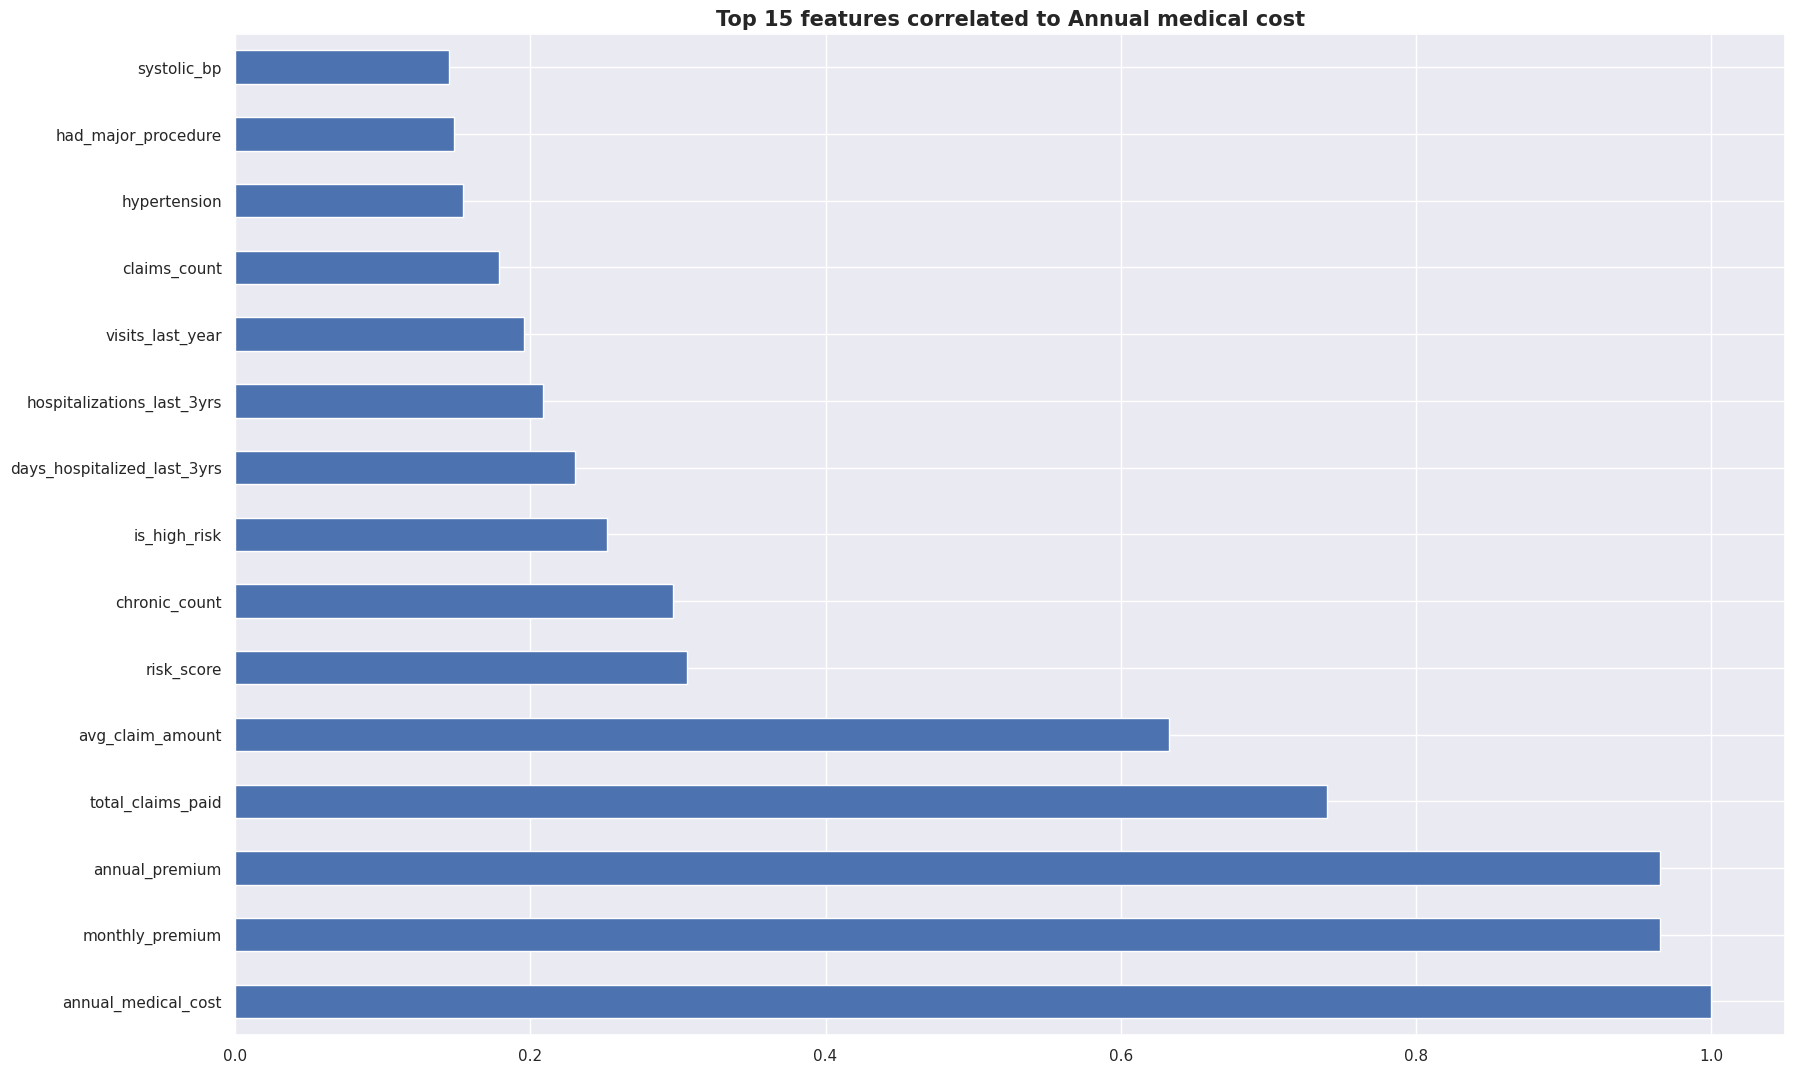

Text(0.5, 1.0, 'Correlation Matrix of top 20 features correlated to Annual medical cost')

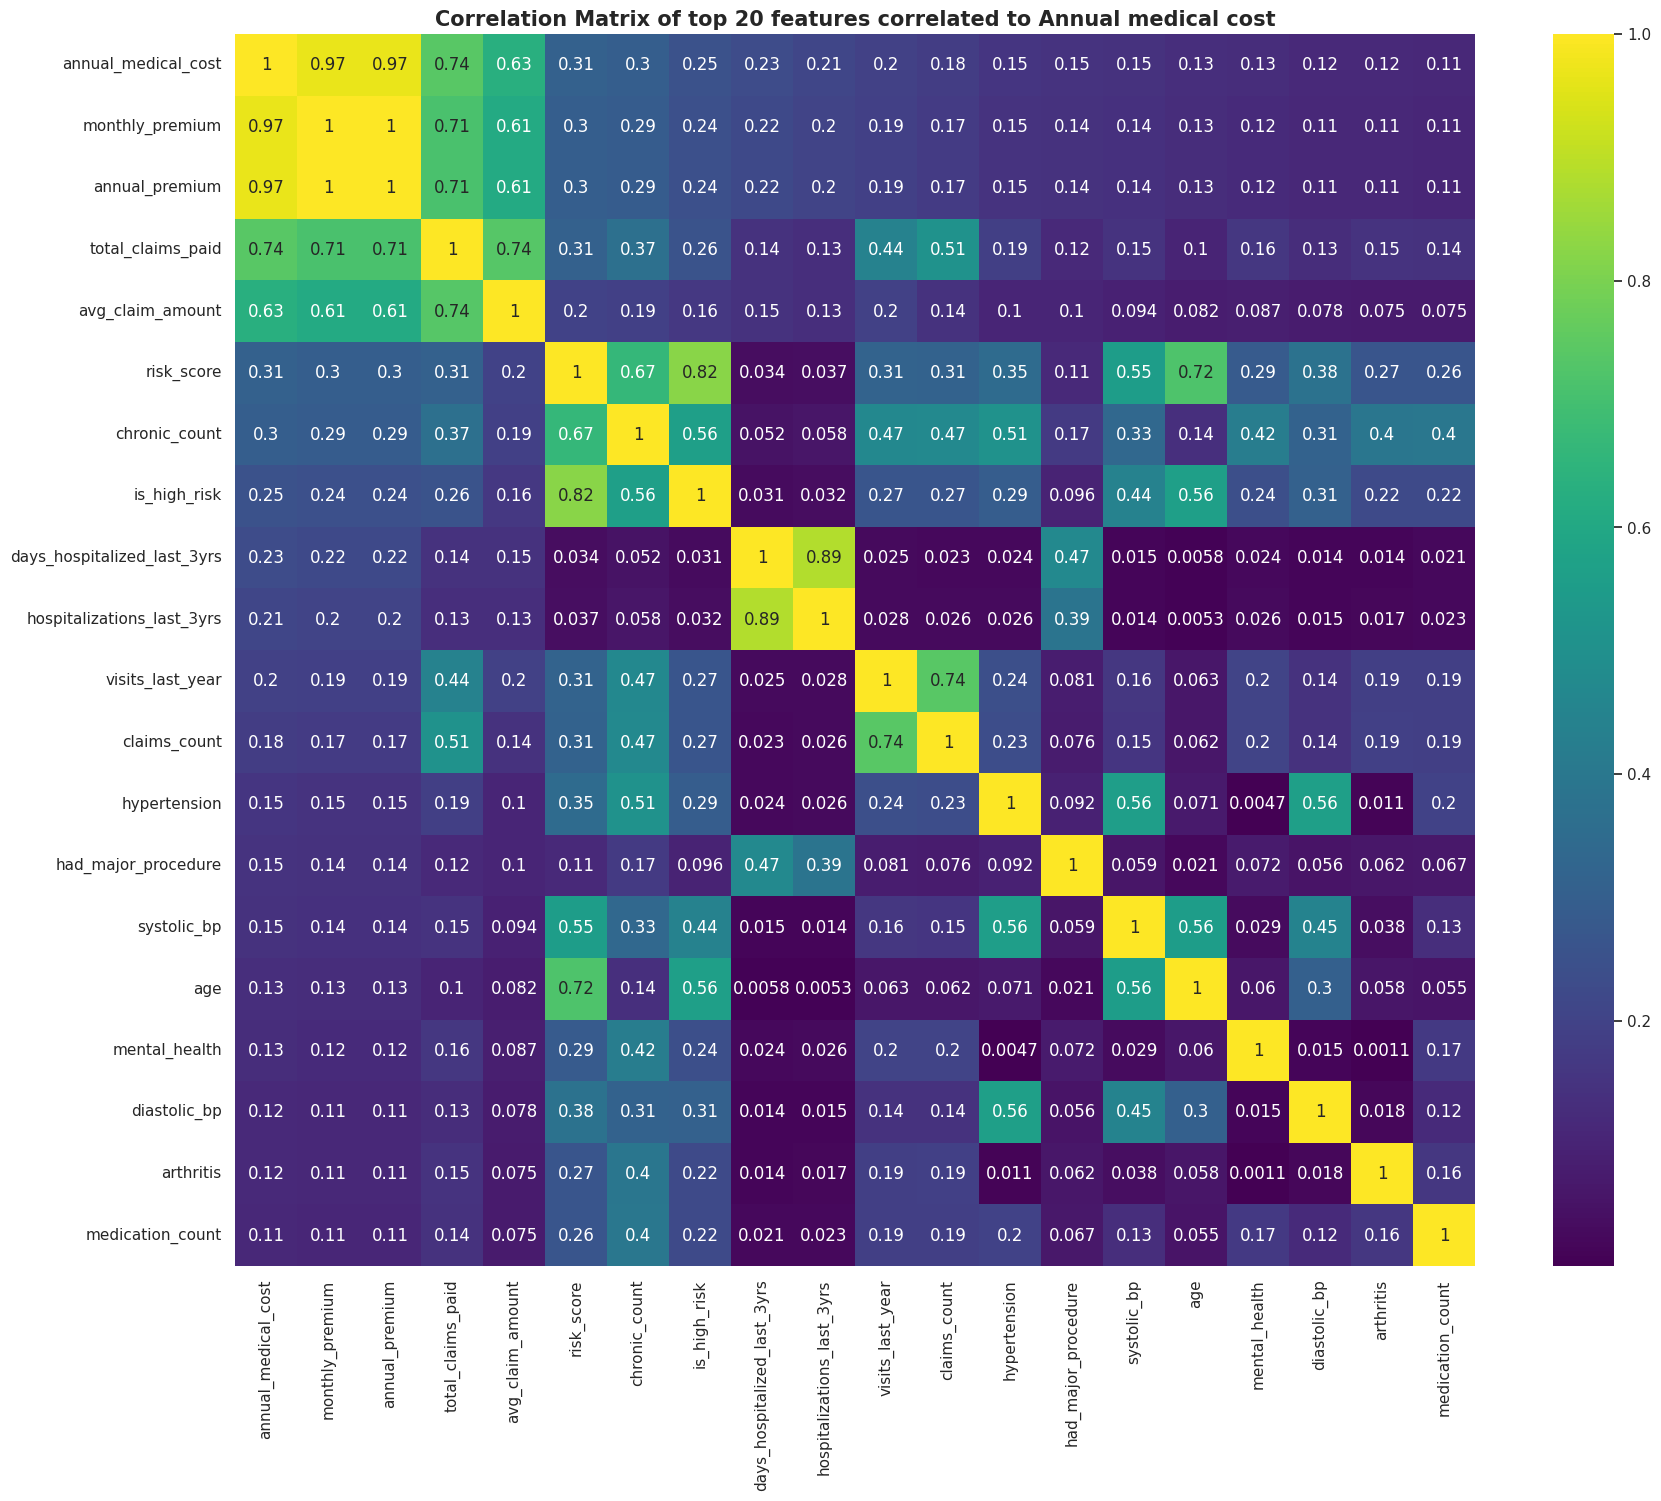

In [7]:
#correlation analysis with respect to annual medical cost
num_cols=df.select_dtypes(include=[np.number]).columns
corr=df[num_cols].corr()
corr_=corr['annual_medical_cost'].sort_values(ascending=False).head(15)
corr_.plot(kind='barh',figsize=(20,13)).set_title('Top 15 features correlated to Annual medical cost',fontsize=15,fontweight='bold')
plt.show()

top_features=corr['annual_medical_cost'].abs().nlargest(20).index
plt.figure(figsize=(20,16))
sns.heatmap(df[top_features].corr(),annot=True,cmap='viridis').set_title('Correlation Matrix of top 20 features correlated to Annual medical cost',fontsize=15,fontweight='bold')





Procedure and chronic disease analysis

Text(0, 0.5, 'Annual Medical Cost')

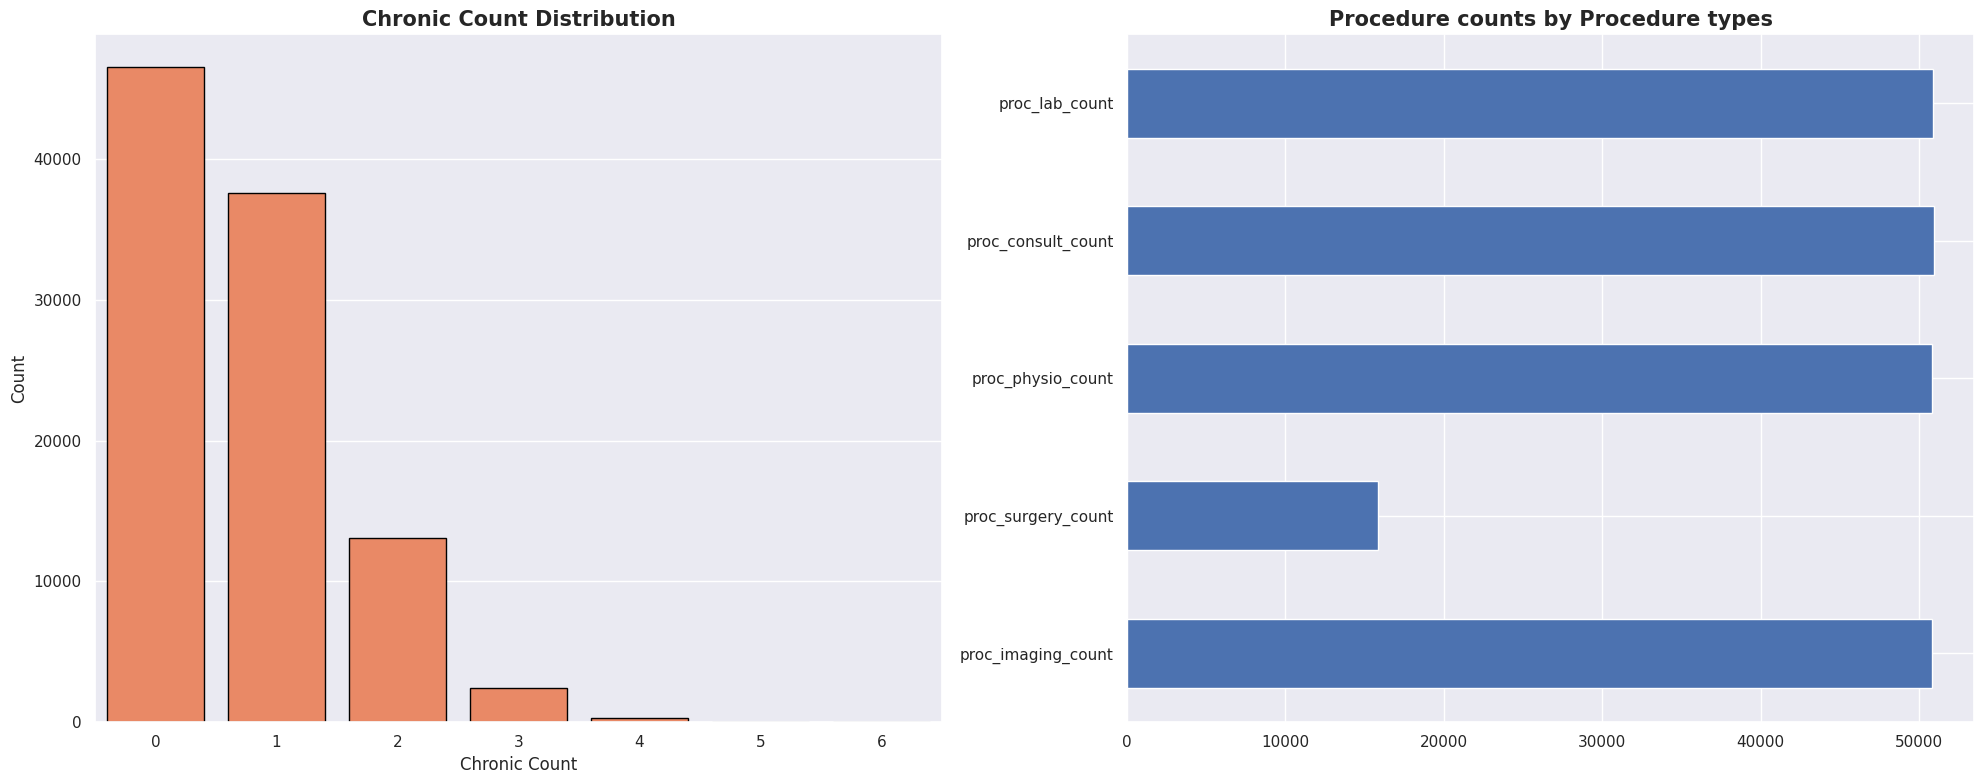

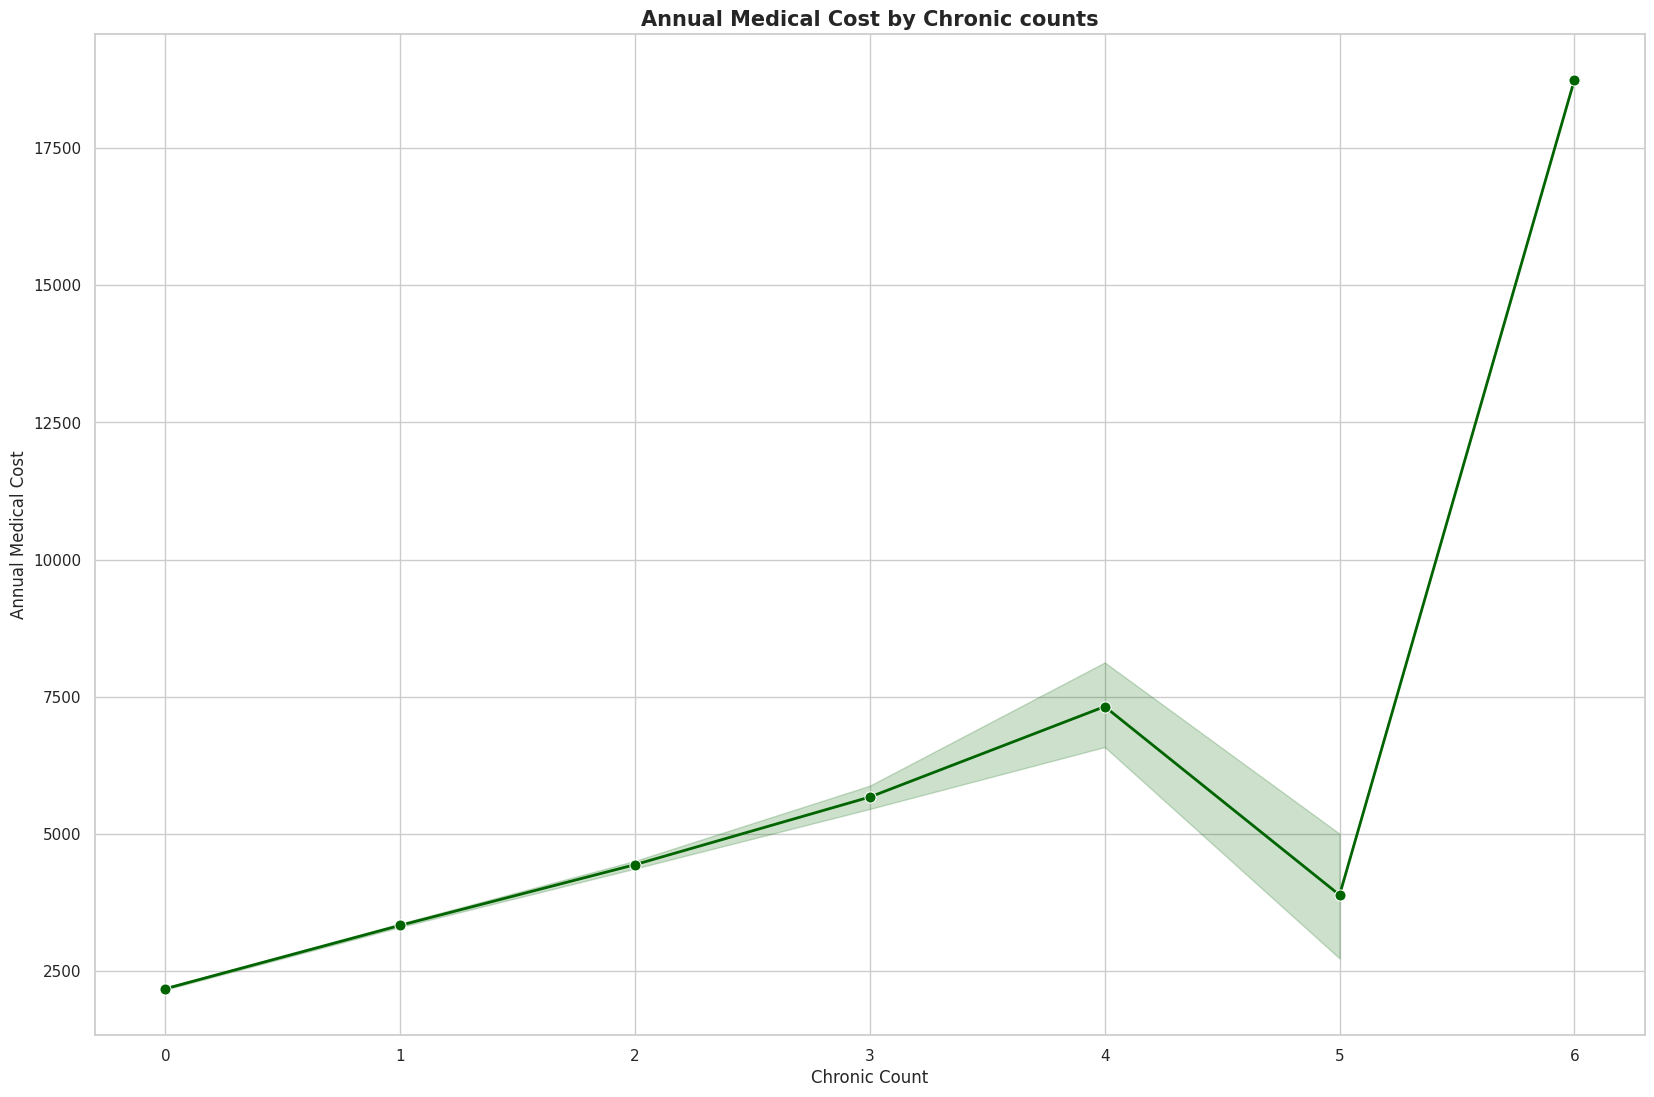

In [8]:
fig,axes=plt.subplots(1,2,figsize=(20,8))
sns.countplot(data=df,x='chronic_count',color='coral',edgecolor='black',ax=axes[0]).set_title('Chronic Count Distribution',fontsize=15,fontweight='bold')
df[['proc_imaging_count','proc_surgery_count','proc_physio_count','proc_consult_count','proc_lab_count']].sum().plot(kind='barh',ax=axes[1]).set_title('Procedure counts by Procedure types',fontsize=15,fontweight='bold')

for ax in axes.flat:
    ax.set_xlabel(ax.get_xlabel().replace('_',' ').title(),fontsize=12)
    ax.set_ylabel(ax.get_ylabel().replace('_',' ').title(),fontsize=12)

fig.tight_layout()
fig.show()

sns.set_style('whitegrid')
fig,ax=plt.subplots(figsize=(20,13))
sns.lineplot(data=df,x='chronic_count',y='annual_medical_cost',marker='o',markersize=8,linewidth=2,color='darkgreen').set_title('Annual Medical Cost by Chronic counts',fontsize=15,fontweight='bold')
ax.set_xlabel(ax.get_xlabel().replace('_',' ').title(),fontsize=12)
ax.set_ylabel(ax.get_ylabel().replace('_',' ').title(),fontsize=12)



Date Preprocessing

In [9]:
cat_columns=[]
for col in df.columns:
    if df[col].dtype=='object' and col not in ['alcohol_freq','network_tier']:
        cat_columns.append(col)

cat_columns

['sex',
 'region',
 'urban_rural',
 'education',
 'marital_status',
 'employment_status',
 'smoker',
 'plan_type']

Handling missing values and categorical features and applying regression algorithm for annual medical cost prediction

R2 Score: 0.9663734362782305
Ridge R2 Score: 0.9663756675652585
Random Forest R2 Score: 0.9984788192254531


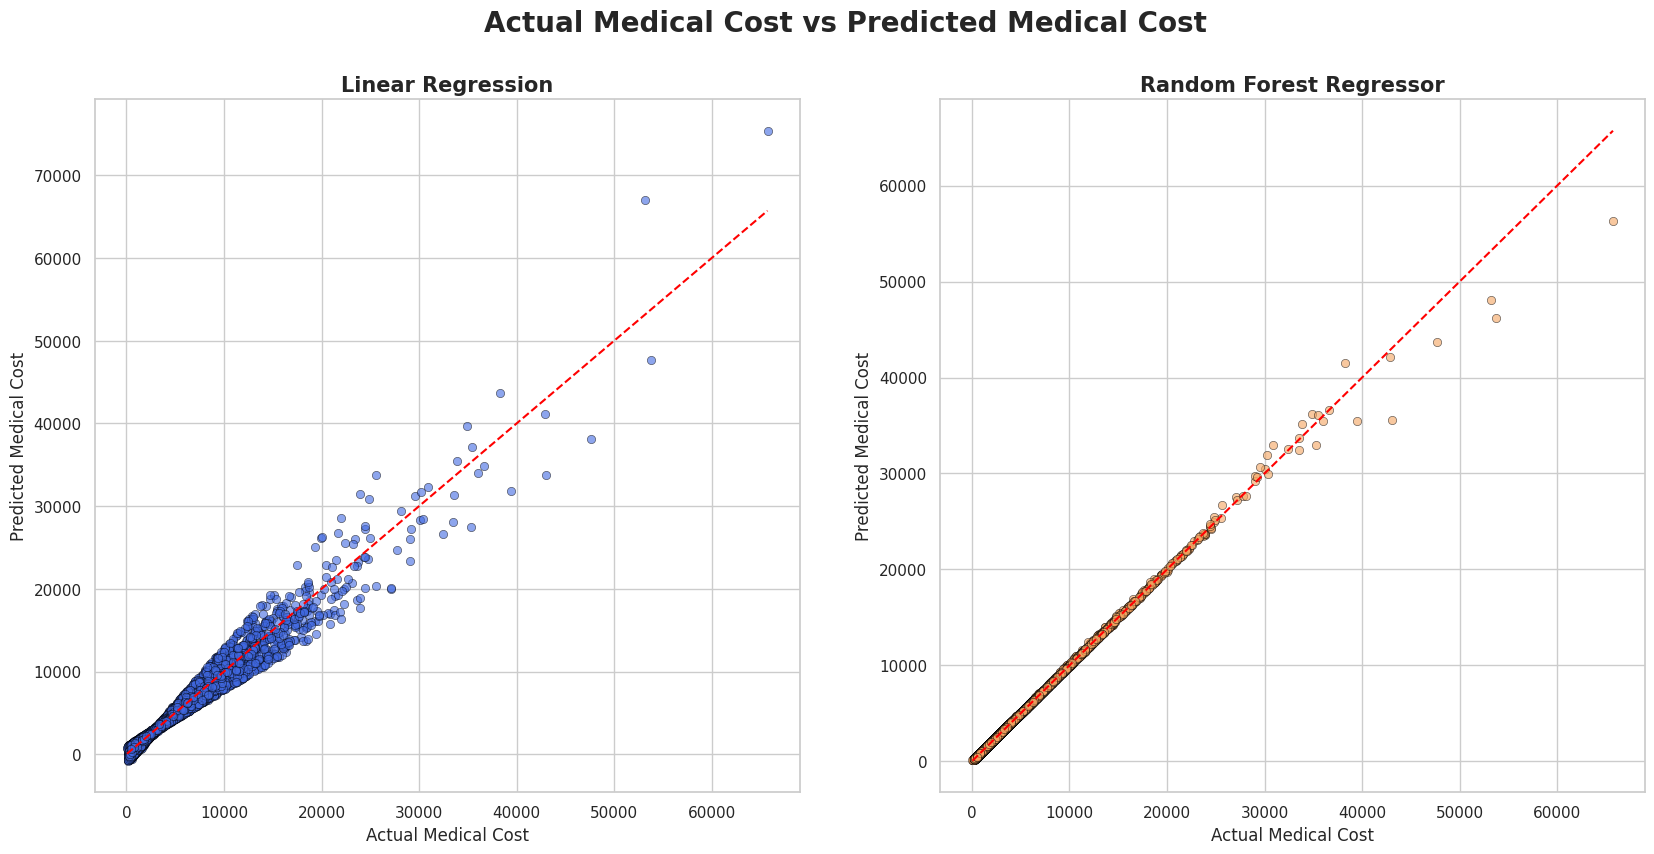

In [10]:
ordinal_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OrdinalEncoder(categories=[
        ['Occasional','Weekly','Daily'],
        ['Bronze','Silver','Gold','Platinum']
    ]))
])

transformer=ColumnTransformer(transformers=[
    ('ordinal',ordinal_pipeline,['alcohol_freq','network_tier']),
    ('nominal',OneHotEncoder(sparse=False,drop='first'),cat_columns),
],remainder='passthrough')




X_regression=df.drop(['person_id','annual_medical_cost','monthly_premium'],axis=1)
Y_regression=df['annual_medical_cost']

x_train,x_test,y_train,y_test=train_test_split(X_regression,Y_regression,test_size=0.2,random_state=42)

x_train_transformed=transformer.fit_transform(x_train)
x_test_transformed=transformer.transform(x_test)


linear_model=make_pipeline(StandardScaler(),LinearRegression())
linear_model.fit(x_train_transformed,y_train)

linear_ridge_model=make_pipeline(StandardScaler(),RidgeCV(cv=100))
linear_ridge_model.fit(x_train_transformed,y_train)

tree_model=RandomForestRegressor(n_estimators=100,random_state=42,n_jobs=-1,max_depth=20)
tree_model.fit(x_train_transformed,y_train)

linear_y_pred=linear_model.predict(x_test_transformed)
linear_ridge_y_pred=linear_ridge_model.predict(x_test_transformed)
tree_y_pred=tree_model.predict(x_test_transformed)

print(f'R2 Score: {r2_score(y_test,linear_y_pred)}')
print(f'Ridge R2 Score: {r2_score(y_test,linear_ridge_y_pred)}')
print(f'Random Forest R2 Score: {r2_score(y_test,tree_y_pred)}')


fig,axes=plt.subplots(1,2,figsize=(20,9))
fig.suptitle('Actual Medical Cost vs Predicted Medical Cost',fontsize=20,fontweight='bold')
sns.scatterplot(x=y_test,y=linear_y_pred,color='royalblue',edgecolor='black',alpha=0.6,ax=axes[0]).set_title('Linear Regression',fontsize=15,fontweight='bold')
sns.scatterplot(x=y_test,y=tree_y_pred,color='sandybrown',edgecolor='black',alpha=0.6,ax=axes[1]).set_title('Random Forest Regressor',fontsize=15,fontweight='bold')
sns.lineplot(x=y_test,y=y_test,color='red',linestyle='--',ax=axes[0])
sns.lineplot(x=y_test,y=y_test,color='red',linestyle='--',ax=axes[1])

for ax in axes.flat:
    ax.set_xlabel('Actual Medical Cost',fontsize=12)
    ax.set_ylabel('Predicted Medical Cost',fontsize=12)
    ax.grid(True)
    
plt.show()





In [11]:
important_features=pd.DataFrame({
    'importance':tree_model.feature_importances_,
    'features':transformer.get_feature_names_out()
}).sort_values(by='importance',ascending=False)

important_features.head(20)

,importance,features
45,0.940594,remainder__annual_premium
1,0.056580,ordinal__network_tier
48,0.000765,remainder__total_claims_paid
39,0.000681,remainder__deductible
38,0.000181,remainder__hba1c
53,0.000153,remainder__copd
37,0.000125,remainder__ldl
47,0.000083,remainder__avg_claim_amount
27,0.000068,remainder__income
35,0.000049,remainder__systolic_bp


Classification based on risk level

Classification Report of Logistic Regression: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12599
           1       1.00      1.00      1.00      7401

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

Classification Report of Random Forest Classifier: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12599
           1       1.00      1.00      1.00      7401

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



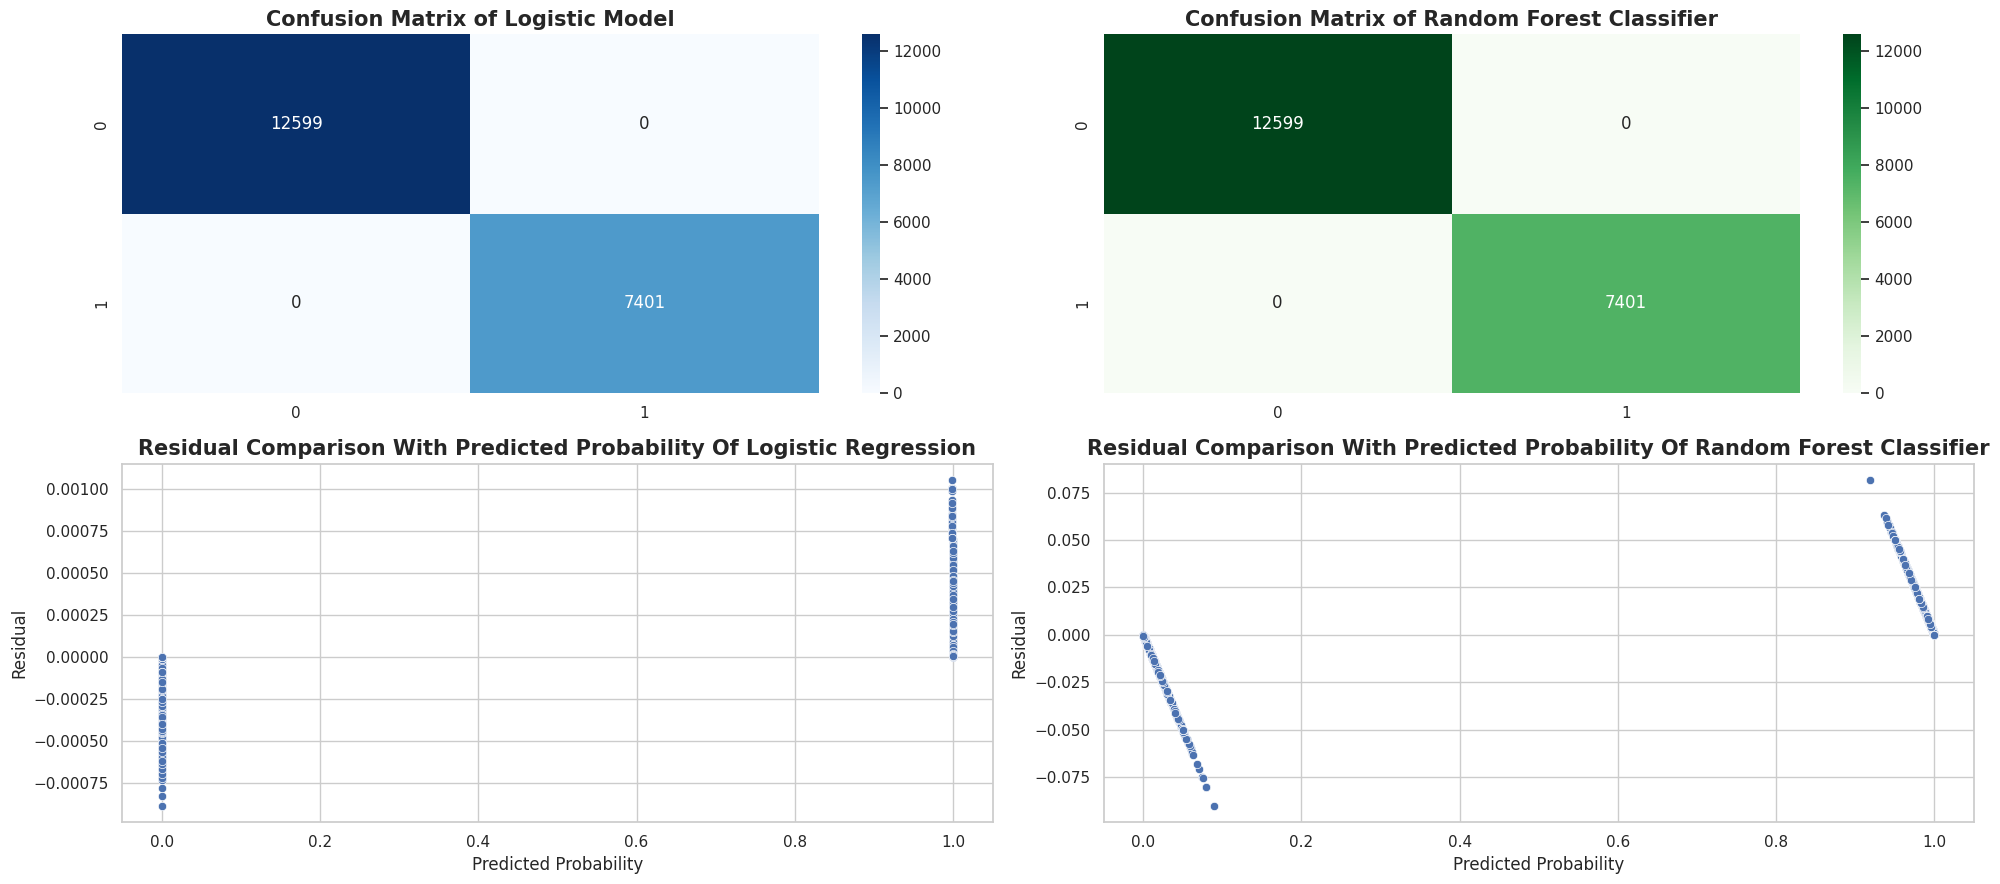

In [12]:
x_class=df.drop(['person_id','monthly_premium'],axis=1)
y_class=df['is_high_risk']

x_train_,x_test_,y_train_,y_test_=train_test_split(x_class,y_class,test_size=0.2,random_state=42)

x_train_class_transformed=transformer.fit_transform(x_train_)
x_test_class_transformed=transformer.transform(x_test_)

logistic_model=make_pipeline(StandardScaler(),LogisticRegression())
logistic_model.fit(x_train_class_transformed,y_train_)

tree_class_model=RandomForestClassifier(n_estimators=100,n_jobs=-1,max_depth=15,random_state=42)
tree_class_model.fit(x_train_class_transformed,y_train_)

y_pred_logistic=logistic_model.predict(x_test_class_transformed)
y_pred_tree=tree_class_model.predict(x_test_class_transformed)

y_prob_logistic=logistic_model.predict_proba(x_test_class_transformed)[:,1]
y_prob_tree=tree_class_model.predict_proba(x_test_class_transformed)[:,1]

resi_log=y_test_-y_prob_logistic
resi_tree=y_test_-y_prob_tree

print(f'Classification Report of Logistic Regression: \n{classification_report(y_test_,y_pred_logistic)}')
print('='*80)
print(f'Classification Report of Random Forest Classifier: \n{classification_report(y_test_,y_pred_tree)}')

fig,axes=plt.subplots(2,2,figsize=(20,9))
sns.heatmap(confusion_matrix(y_test_,y_pred_logistic),ax=axes[0,0],annot=True,fmt='d',cmap='Blues')
sns.heatmap(confusion_matrix(y_test_,y_pred_tree),ax=axes[0,1],annot=True,cmap='Greens',fmt='d')
sns.scatterplot(x=y_prob_logistic,y=resi_log,ax=axes[1,0])
sns.scatterplot(x=y_prob_tree,y=resi_tree,ax=axes[1,1])

axes[0,0].set_title('Confusion Matrix of Logistic Model',fontsize=15,fontweight='bold')
axes[0,1].set_title('Confusion Matrix of Random Forest Classifier',fontsize=15,fontweight='bold')
axes[1,0].set_title('Residual Comparison With Predicted Probability Of Logistic Regression',fontsize=15,fontweight='bold')
axes[1,0].set_xlabel('Predicted Probability',fontsize=12)
axes[1,0].set_ylabel('Residual',fontsize=12)
axes[1,1].set_title('Residual Comparison With Predicted Probability Of Random Forest Classifier',fontsize=15,fontweight='bold')
axes[1,1].set_xlabel('Predicted Probability',fontsize=12)
axes[1,1].set_ylabel('Residual',fontsize=12)

fig.tight_layout()
fig.show()